<a href="https://colab.research.google.com/github/severancej/colorful_project/blob/main/Project_Section2/AI_14_%EC%9E%A5%EC%A7%80%EC%9D%80_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🔔필요한 라이브러리 미리 설치함

In [1]:
import pandas as pd
import numpy as np
import re # 정규표현식 = Regular Expressions
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# sklearn 버전 확인 -> 0.23 이상으로 설치되었는지 확인
#0.23미만이면 재설치 필요함 
import sklearn
sklearn.__version__


'1.0.2'

In [3]:
# 인코더 라이브러리 설치
#원핫인코딩 카테고리인코딩등 인코딩 라이브러리)
!pip install category_encoders

# pandas_profiling 설치
!pip install pandas-profiling==3.1.0

# fast_ml은 fit() 및 transform() 메서드와 함께 Scikit-learn 유형 기능을 따라
# 먼저 교육 데이터 세트에서 변환 매개 변수를 학습한 다음 
# 교육/검증/테스트 데이터 세트를 변환합니다.
!pip install fast_ml 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 🔔코랩에서 matplotlib 라이브러리의 한글 깨짐 현상을 방지하기 위해서 필요한 한글폰트 설치함.

In [4]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [5]:
# matplotlib의 폰트를 Nanum 폰트로 지정합니다.
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

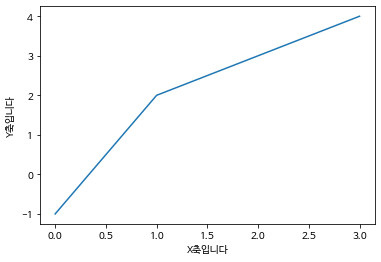

In [6]:
#그래프에서 한글이 잘 나오는지 확인합니다.
plt.plot([-1, 2, 3, 4])
plt.xlabel('X축입니다')
plt.ylabel('Y축입니다')
plt.show()

---
---
<br>

##⬇️ 데이터를 가져온 사이트
### [📌DMV(= 캘리포니아주 자동차관리국) - 2021 Autonomous Vehicle Disengagement Reports](https://www.dmv.ca.gov/portal/vehicle-industry-services/autonomous-vehicles/disengagement-reports/)<br><br>

## ✒️데이터 설명 
> 아래 데이터 파일에는 2020년 12월 1일과 2021년 11월 30일 사이에<br>캘리포니아 공공도로에서  자율주행차량을 테스트할 수 있는 허가를 받은 각 회사는<br> DMV(= 차량관리국)에 자율주행시스템을 해제하고 운전한 이유를 반드시 보고해야 합니다.<br><br> 자율주행시스템의 해제를<br> **"자율주행시스템이 오류가 감지되거나<br> 차량의 안전한 작동을 위해 자율주행차량 테스트운전자가 자율주행모드를 해제**하고<br> 즉각적인 수동운전을 취해야 할 때 자율주행 모드가 비활성화되는 것"으로 정의합니다.


<br><br>

---
---

 

# ⭐파일을 업로드함⬇️

In [7]:
from google.colab import files
uploaded = files.upload() 

Saving 2021-Autonomous-Vehicle-Disengagements-Reports-CSV.csv to 2021-Autonomous-Vehicle-Disengagements-Reports-CSV (1).csv


---
---

####👆🏻 pd.read_csv에 파라미터로 encoding='cp1252'을 쓴 이유는 
####인코딩 없이 불러오니깐 'utf-8'에러가 나서 씀
해결팁 주소 = https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte

In [8]:
df = pd.read_csv('2021-Autonomous-Vehicle-Disengagements-Reports-CSV.csv'\
                 ,encoding='cp1252')
#pd.read_csv에 파라미터로 encoding='cp1252'을 쓴 이유는 
#인코딩 없이 불러오니깐 'utf-8'에러가 나서 씀


#df확인
df.head(11)

,Manufacturer,Permit Number,DATE,VIN NUMBER,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),DRIVER PRESENT\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT,Unnamed: 9
0,AIMOTIVE INC.,AVT036,2021.03.04.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,During an exit/merge the test vehicle was goin...,NaN
1,AIMOTIVE INC.,AVT036,2021.03.16.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss...",NaN
2,AIMOTIVE INC.,AVT036,2021.03.16.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss...",NaN
3,AIMOTIVE INC.,AVT036,2021.03.16.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,During an exit/merge the test vehicle was goin...,NaN
4,AIMOTIVE INC.,AVT036,2021.04.02.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,"The car should have stayed in the left lane, b...",NaN
5,AIMOTIVE INC.,AVT036,2021.04.02.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss...",NaN
6,AIMOTIVE INC.,AVT036,2021.04.13.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,During an exit/merge the test vehicle was goin...,NaN
7,AIMOTIVE INC.,AVT036,\t2021.04.14.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,During an exit/merge the test vehicle was goin...,NaN
8,AIMOTIVE INC.,AVT036,2021.04.16.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,During an exit/merge the test vehicle was goin...,NaN
9,AIMOTIVE INC.,AVT036,2021.04.16.,JTDKN3DU9A0059509,No,Yes,Test Driver,Freeway,"The car should have stayed in the left lane, b...",NaN


In [9]:
#df크기,
print(df.shape)
#데이터타입과 결측치들 확인 확인
df.info()

(2676, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 10 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   Manufacturer                                                                                    2676 non-null   object
 1   Permit Number                                                                                   2676 non-null   object
 2   DATE                                                                                            2676 non-null   object
 3   VIN NUMBER                                                                                      2676 non-null   object
 4   VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER
(Yes or No)                                    2676 non-null   object
 5   DRIVER PR

# 🔍전처리 전 profiling을 사용하여 전체 데이터의 특징을 살펴봄⬇️

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
---
# 　 ✅특성(=features) 설명✅<br><br>

> - Manufacturer = 자동차 제조회사
<br><br>
- Permit Number = 캘리포니아 시내 자율주행 시범운행 허가번호	<br><br>
- DATE	= 운행날짜<br><br> 운행날짜
- VIN NUMBER = Vehicle Identification Number(=VIN) = **차량 식별 번호**<br>➡️ 대한민국 한 사람에게 주어지는 주민등록번호처럼 **오직 한 자동차에게만 주어지는 고유번호**<br><br> 
- VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER(Yes or No)<br>	= 차량은 운전자 없이 작동할 수 있습니다(예 또는 아니오)<br><br>
- DRIVER PRESENT(Yes or No)	= 운전자 있음(예 또는 아니오) <br><br>
- DISENGAGEMENT INITIATED BY(AV System, Test Driver, Remote Operator, or Passenger)<br>=해체 시작자(AV 시스템, 테스트 드라이버, 원격 조작자 또는 승객)<br><br>
- DISENGAGEMENT LOCATION (Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)<br>=	해체 위치(주 간, 고속도로, 시골 도로, 거리 또는 주차 시설<br><br>
- DESCRIPTION OF FACTS CAUSING DISENGAGEMENT <br>= 단절을 유발하는 사실의 설명➡️ 자율주행시스템만으로 운전하다가 시스템이 풀리고, **차량제어권이 자율주행 시스템에서 사람에게로 넘어간 이유** <br><br>

---
---

In [11]:
#결측치 확인
#컬럼면 확인도 됨
df.isnull().sum()

Manufacturer                                                                                           0
Permit Number                                                                                          0
DATE                                                                                                   0
VIN NUMBER                                                                                             0
VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)                                          0
DRIVER PRESENT\n(Yes or No)                                                                            0
DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)                    0
DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)       0
DESCRIPTION OF FACTS CAUSING DISENGAGEMENT                                                             0
Unnamed: 9                                             

In [12]:
# 사고원인이 계절이나 날씨에 관련됐는지 확인을 위해
df['DATE'].value_counts()

3/11/2021     52
3/22/2021     41
11/17/2021    33
11/19/2021    28
11/5/2021     28
              ..
2021-05-27     1
2021-06-03     1
12/10/2020     1
12/18/2020     1
2021-07-01     1
Name: DATE, Length: 1051, dtype: int64

In [13]:
df['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)'].value_counts()
# 안전을 위해 탑승중인 운전자가 없이 주행할수 있는 정도는 자율주행 5단계에 해단한다.

No     2588
Yes      48
NO       40
Name: VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No), dtype: int64

In [14]:
df['DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)'].value_counts()

Test Driver                   2035
AV System                      368
Test Driver - Soft Stop        151
AV System - Emergency Stop      71
Test Drive                      23
Driver                          19
Software                         7
Operator                         2
Name: DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger), dtype: int64

---
---

#✨📋전처리 해야 할 점 정리⭐<br><br>

##📍 원본데이터 특징
> 데이터의 크기는 (2676, 10)이고<br>
column의 데이터타입의 모두 object타입을 가졌습니다.<br>

<br>

---

<br>
<br>


# 1️⃣
결측치는 10개의 특성 중 'Unnamed:9'에만 2676개의 전제데이터 중에  2605개의 결측치가 있다고 나왔는데,<br>
'Unnamed:9'는 <br>전체 특성 중 'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'<br> (= **자율주행시스템만으로 시범운행 중<br>
운전의 제어권이 자율주행 시스템에서 사고방지를 위해 
탑승 중인 운전자에게 넘어간 이유**)에 대한<br> 부가적인 설명을 일부데이터에만 한 단어로 부가 설명 했기 때문에<br>
<br> 
### 👉🏻 **운전제어권의 이탈원인을 체크하는데 <br>굳이 'Unnamed:9'특성이 없어도 확인 가능하므로 삭제하기로 결정함. **<br><br>


# 2️⃣.
프로파일링으로 Variables을 확인한 결과,<br>
'Manufacturer'와 'Permit Number'의 value_counts가 숫자가 똑같은것으로 보아<br>
제조사 하나당 시범운행허가번호가 부여되는것으로 추측된다.<br>
### 👉🏻 'Manufacturer'와 'Permit Number'특성 중에서<br>둘 중에 하나만 남겨도, 다른 특성들을 구분하는데 문제없어 보이므로<br>**'Permit Number'특성을 삭제한다.**
<br><br>
# 3️⃣.
'VIN NUMBER'-사고원인의 빈도수를 파악하는데,제조사만으로 충분한것 같음.<br> 'VIN NUMBER'가 이상하게 잘못 쓰여있다고 해도 내가 알아채거나 확인 할 방법이 없어서 삭제.
<br><br>
### 👉🏻특성 'VIN NUMBER' 삭제
<br><br>

# 4️⃣.
'DATE'의 모든 데이터 타입이 object로 되어있음.<br>
'DATE'표현 방식은 9자리
> 1) 월/일/마지막 두자리 연도  = 예)12/2/20<br><br>
2) 네자리연도 - 월 - 일        = 예)2020/12/01<br><br>
3) 네자리연도/월/일 24시간:분  = 예)2020/11/30 17:09<br><br>
4) 네자리연도.월.일.           = 예)2021.03.04.<br><br>
5) (빈공백)네자리연도.월.일. =예)\t2021.04.14.<br><br>
6) 네자리연도.월.일 = 예) 2021.10.13 <br><br>
7) 일-(영어로표기)월-두자리연도 = 예)17-Jun-21<br><br>
8) 네자리연도-월-일 / 24시간표시:분:초 = 예) 2020-12-07 / 10:11:26 <br><br>
9) 네자리연도-월-일 / 24시간표시:분 = 예) 2020-11-30 5:09:05 PM<br><br>




#### ✂️ **'DATE'**는 to_datetime이용해 **데이터타입을 바꾸고**,<br>통제권 변환 이유를 날씨와 상관관계를 확인하고 싶었습니다.<br> 캘리포니아의 과거 날짜 별 기온,비,눈,바람을 알고 싶지만,<br>**미국의 공식적인 사이트**로는 알 수 있는 방법을 못 찾기도 했고<br> 너무 HIGH CARDINALITY여서
###👉🏻 **'DATE'를 삭제시키기로 결정**   <br><br>





# 5️⃣.
'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER (Yes or No)'는 고윳값은 원래 2가진인데<br>
프로파일링으로 확인한 결과 표현방식에 따라 3가지로 나옴<br>
- No	2588
- Yes	 48
- NO	 40

**'Yes'는 자율주행 5단계에 해당하는 것 같음.** <br>
### 👉🏻 'NO'를 No로 바꿈<br><br>



# 6️⃣.
'DRIVER PRESENT (Yes or No)'는 모든 값이 표현이 달라서 Yes,YES 2가지로 표현되지만,<br>**모든값이 'Yes'이다. **<br> 위급상황을 위해 항상 테스트운전자가 항상 타고 있어야 해서, 타겟을 분석하는데 필요없음.
### 👉🏻'DRIVER PRESENT (Yes or No)'를 삭제함.
<br><br>
# 7️⃣.
'DISENGAGEMENT INITIATED BY (AV System, Test Driver, Remote Operator, or Passenger)'는 <br>value_counts로 확인한 결과 
- Test Driver                   2035
- AV System                      368
- Test Driver - Soft Stop        151
- AV System - Emergency Stop      71
- Test Drive                      23
- Driver                          19
- Software                         7
- Operator                         2
### 👉🏻 <br>1) AV System - Emergency Stop을 AV System으로<br>2) Test Driver - Soft Stop , Test Drive를 Test Driver로 변환

<br><br>


# 8️⃣.
 'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'는
**HIGH CARDINALITY**지만<br> 시스템이 왜 해제되는지 설명하는 중요한 특성이기 때문에<br>
 
 ### 👉🏻고윳값 365개를 **최대한** 공통되는 단어로 수정해서, CARDINALITY를 **줄여야** 한다.
<br><br>

---
---




# 🧹전처리 시작!!

In [15]:
#전처리 과정에서 원본을 보호하기 위해 copy함.
df_c = df.copy()

In [16]:
df_c.columns

Index(['Manufacturer', 'Permit Number', 'DATE', 'VIN NUMBER',
       'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)',
       'DRIVER PRESENT\n(Yes or No)',
       'DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)',
       'DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)',
       'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT', 'Unnamed: 9'],
      dtype='object')

In [17]:
# 삭제하기로 결정한 columns를 삭제
# 전체 10개 column 중 5개 삭제
# columns_list =['Permit Number', 'DATE', 'VIN NUMBER',
#        'DRIVER PRESENT\n(Yes or No)',
#         'Unnamed: 9']
df_c.drop(['Permit Number', 'DATE', 'VIN NUMBER',
       'DRIVER PRESENT\n(Yes or No)',
        'Unnamed: 9'], axis=1,inplace = True)

#컬럼 삭제 후 확인
df_c

,Manufacturer,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No),"DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)","DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)",DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
0,AIMOTIVE INC.,No,Test Driver,Freeway,During an exit/merge the test vehicle was goin...
1,AIMOTIVE INC.,No,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss..."
2,AIMOTIVE INC.,No,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss..."
3,AIMOTIVE INC.,No,Test Driver,Freeway,During an exit/merge the test vehicle was goin...
4,AIMOTIVE INC.,No,Test Driver,Freeway,"The car should have stayed in the left lane, b..."
...,...,...,...,...,...
2671,"ZOOX, INC",No,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...
2672,"ZOOX, INC",No,Test Driver,Street,Planning discrepancy; system planned incorrect...
2673,"ZOOX, INC",No,Test Driver,Street,Planning and Prediction discrepancy; incorrect...
2674,"ZOOX, INC",No,Test Driver,Street,Planning and Prediction discrepancy; incorrect...


### 　　✂️ 컬럼삭제 후 shape가
### 　　**(2676, 10)**에서
## 　　　⬇️
### 　　**(2676, 5)**으로 변함

---
---

In [18]:
#다시 결측치 확인
df_c.isnull().sum()

## 확인결과 결측치 없음

Manufacturer                                                                                        0
VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER\n(Yes or No)                                       0
DISENGAGEMENT INITIATED BY\n(AV System, Test Driver, Remote Operator, or Passenger)                 0
DISENGAGEMENT\nLOCATION\n(Interstate, Freeway, Highway, Rural Road, Street, or Parking Facility)    0
DESCRIPTION OF FACTS CAUSING DISENGAGEMENT                                                          0
dtype: int64

### 🪄 컬럼명 변경



In [19]:
#컬럼명이 너무 길어서 변경
df_c.columns = ['Manufacturer',\
                'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER',\
                'DISENGAGEMENT INITIATED BY','DISENGAGEMENT LOCATION',\
                'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT']
df_c.columns

Index(['Manufacturer', 'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER',
       'DISENGAGEMENT INITIATED BY', 'DISENGAGEMENT LOCATION',
       'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'],
      dtype='object')

In [20]:
df_c

,Manufacturer,VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER,DISENGAGEMENT INITIATED BY,DISENGAGEMENT LOCATION,DESCRIPTION OF FACTS CAUSING DISENGAGEMENT
0,AIMOTIVE INC.,No,Test Driver,Freeway,During an exit/merge the test vehicle was goin...
1,AIMOTIVE INC.,No,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss..."
2,AIMOTIVE INC.,No,Test Driver,Freeway,"Exit/Merge Lane departure, due to the car miss..."
3,AIMOTIVE INC.,No,Test Driver,Freeway,During an exit/merge the test vehicle was goin...
4,AIMOTIVE INC.,No,Test Driver,Freeway,"The car should have stayed in the left lane, b..."
...,...,...,...,...,...
2671,"ZOOX, INC",No,Test Driver,Street,Prediction discrepancy; incorrect trajectory e...
2672,"ZOOX, INC",No,Test Driver,Street,Planning discrepancy; system planned incorrect...
2673,"ZOOX, INC",No,Test Driver,Street,Planning and Prediction discrepancy; incorrect...
2674,"ZOOX, INC",No,Test Driver,Street,Planning and Prediction discrepancy; incorrect...


### 🪄 컬럼 'VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER '에서<br>고윳값 'No','Yes','NO'중에서 **'NO'**를➡️ **'No'**로 바꿈

In [21]:
# VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER '에서
# 고윳값 'No','Yes','NO'중에서 'NO'를 'No'로 바꿈

# 1차 실패
# def misspelled_answer(answer):
#   if df_c['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER'].str == 'NO':
#     return df_c['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER'].replace('NO','No')
#   else:

def unit(x):
  if str(x) == 'NO':
    return str(x).replace('NO','No')
  else:
    return str(x)


df_c['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER'] =\
df_c['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER'].apply(unit)

#제대로 바뀌었는지 확인
df_c['VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER'].value_counts()

# No의 개수가 2588+40("NO"의 개수)=2628 이여야 함

No     2628
Yes      48
Name: VEHICLE IS CAPABLE OF OPERATING WITHOUT A DRIVER, dtype: int64

###🪄 컬럼'DISENGAGEMENT INITIATED BY'에서<br>1) **'AV System - Emergency Stop'**을➡️ **'AV System'**으로<br>2) **'Test Driver - Soft Stop'** , **'Test Drive'**를➡️ 'Test Driver'로 변환

In [22]:
# 🪄 컬럼'DISENGAGEMENT INITIATED BY'에서
# 1) 'AV System - Emergency Stop'을➡️ 'AV System'으로
# 2) 'Test Driver - Soft Stop' , 'Test Drive'를➡️ 'Test Driver'로 변환

## modify = 수정하다
def modify(x):
  if str(x) == 'AV System - Emergency Stop':
    return str(x).replace('AV System - Emergency Stop','AV System')

  elif str(x) == 'Test Driver - Soft Stop':
    return str(x).replace('Test Driver - Soft Stop','Test Driver')
  
  elif str(x) == 'Test Drive':
    return str(x).replace('Test Drive','Test Driver')
  
  elif str(x) == 'Driver':
    return str(x).replace('Driver','Test Driver')
  
  else:
    return str(x)


df_c['DISENGAGEMENT INITIATED BY'] =\
df_c['DISENGAGEMENT INITIATED BY'].apply(modify)

#제대로 바뀌었는지 확인
df_c['DISENGAGEMENT INITIATED BY'].value_counts()

Test Driver    2228
AV System       439
Software          7
Operator          2
Name: DISENGAGEMENT INITIATED BY, dtype: int64

###🪄 컬럼'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'는 HIGH CARDINALITY지만


시스템이 왜 해제되는지 설명하는 중요한 특성이기 때문에

👉🏻고윳값 365개를 최대한 공통되는 단어로 수정해서, CARDINALITY를 줄여야 한다.


In [23]:
#시각적 탐색을 위한 코드
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [24]:
#일단 고유값 모두 확인

# 프로파일링 결과 'DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'고유값의 개수가 
# 365개인것을 확인했고
# CARDINALITY를 줄이기 위해서 고윳값 모두 확인
pd.DataFrame(df_c.value_counts\
             (subset = ['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT']),\
             columns=["고윳값 개수"])


,고윳값 개수
DESCRIPTION OF FACTS CAUSING DISENGAGEMENT,
Map discrepancy led to undesirable motion plan,289
The Test Driver saw an inanimate obstacle ahead and preemtively triggered a soft stop,151
Disengage for a software discrepancy for which our vehicle's diagnostics received a message indicating a potential performance issue with a software component,135
"Safety Driver disengaged autonomous mode due to inappropriate braking, caused by perception issue.",129
The operator disengaged the system manually to remain in the operational design domain. The driver performed a steering manouver to correct the trajectory of the vehicle.,72
Safety Driver disengaged autonomous mode to ensure proper behavior at traffic light,71
Undesirable motion plan resulted in incorrect vehicle position on roadway,63
The software detected an inanimate object in the AV's path and triggered an Estop,61
Disengage for a perception discrepancy for which a component of the vehicle's perception system failed to detect an object correctly,59


In [25]:
# CARDINALITY를 줄이기 위해 컬럼 내 고윳값 바꾸는 작업
# summarize = 요약하다

def summarize(x):
  if str(x) == 'Map discrepancy led to undesirable motion plan':
    return str(x).replace('Map discrepancy led to undesirable motion plan',\
                    'System information and actual information are different')
   #시스템의 정보와 실제정보의 차이로 인한 자동차의 잘못된 운행때문에

  elif str(x) == 'The Test Driver saw an inanimate obstacle ahead and\
    preemtively triggered a soft stop':
    return str(x).replace('The Test Driver saw an inanimate obstacle ahead and\
    preemtively triggered a soft stop','Late recognition of forward obstacles')
    # 전방 장애물에 대한 늦은 인식
  
  elif str(x) == "Disengage for a software discrepancy for which our vehicle's\
    diagnostics received a message indicating a potential performance issue \
    with a software component":
    return str(x).replace("Disengage for a software discrepancy for which our \
    vehicle's diagnostics received a message indicating a potential performance\
    issue with a software component", 'Vehicle warning for software')
    #소프트웨어에 대한 차량 시스템경고
  
  elif str(x) == 'Safety Driver disengaged autonomous mode due to inappropriate\
    braking, caused by perception issue.':
    return str(x).replace('Safety Driver disengaged autonomous mode due to \
    inappropriate braking, caused by perception issue.',\
    'Test Driver Mistake')
   #운전자가 잘못 인식해서 브레이크 밟음.

  elif str(x) == 'The operator disengaged the system manually to remain in the \
  operational design domain. The driver performed a steering manouver to correct \
  the trajectory of the vehicle.':
    return str(x).replace('The operator disengaged the system manually to remain \
    in the operational design domain. The driver performed a steering manouver \
    to correct the trajectory of the vehicle.',\
    'Trying to update vehicle design system information')
   # 차량설계시스템에 정보를 업데이트 하려고

  elif str(x) == 'Safety Driver disengaged autonomous mode to ensure proper \
  behavior at traffic light':
    return str(x).replace('Safety Driver disengaged autonomous mode to ensure \
    proper behavior at traffic light','Late reaction to signals at traffic lights')
    # 신호등 신호에 대한 차량의 늦은 반응
  elif str(x) == 'Undesirable motion plan resulted in incorrect vehicle position \
  on roadway':
    return str(x).replace('Undesirable motion plan resulted in incorrect vehicle \
    position on roadway','Incorrect vehicle driving of AV System')
    # AV System의 잘못된 차량운전             

  elif str(x) == "The software detected an inanimate object in the AV's path \
  and triggered an Estop":
    # Estop = 비상정지
    return str(x).replace("The software detected an inanimate object in the AV's \
    path and triggered an Estop",'Estop of vehicle due to obstacle recognition ')
    # 장애물 인식으로 인한 차량의 비상정지
  
  elif str(x) == 'Motion control health check caused software kickout':
    return str(x).replace('Motion control health check caused software kickout',\
                          'Vehicle warning for software')
    #소프트웨어에 대한 차량 시스템경고

  elif str(x) == 'Disengage for unwanted maneuver of the vehicle that was \
  undesirable under the circumstances':
    return str(x).replace('Disengage for unwanted maneuver of the vehicle that \
    was undesirable under the circumstances','Incorrect vehicle driving of \
    AV System')
    # AV System의 잘못된 차량운전

  elif str(x) == 'Incorrect prediction of vehicle caused undesirable motion plan':
    return str(x).replace('Incorrect prediction of vehicle caused undesirable \
    motion plan','Incorrect vehicle driving of AV System')
    # AV System의 잘못된 차량운전

  elif str(x) == 'Incorrect perception led to undesirable motion plan':
    return str(x).replace('Incorrect perception led to undesirable motion plan',\
                          'Incorrect driving due to recognition error of AV')
    # 자율주행차량의 인식오류로 인한 잘못된 주행 

  elif str(x) == 'Incorrect perception of traffic signal led to undesirable \
  motion plan':
    return str(x).replace('Incorrect perception of traffic signal led to \
    undesirable motion plan','Recognition error for traffic light signals')
    #신호등 신호 인식 오류

  elif str(x) == 'Driver disengagement due to safety monitor notification of \
  planning discrepancy in the determination of vehicle trajectory':
    return str(x).replace('Driver disengagement due to safety monitor \
    notification of planning discrepancy in the determination of vehicle trajectory'\
    ,' ')
  elif str(x) == '  ':
    return str(x).replace(' ',' ')
  elif str(x) == '  ':
    return str(x).replace(' ',' ')
  
  
  else:
    return str(x)

# Circumstances at the time of conversion = 전환시점의 상황
df_c['Circumstances at the time of conversion'] =\
df_c['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'].apply(summarize)

#제대로 바뀌었는지 확인
df_c['DESCRIPTION OF FACTS CAUSING DISENGAGEMENT'].value_counts()


Map discrepancy led to undesirable motion plan                                                                                                                                                                                                                                                                                                                                                                 289
The Test Driver saw an inanimate obstacle ahead and preemtively triggered a soft stop                                                                                                                                                                                                                                                                                                                          151
Disengage for a software discrepancy for which our vehicle's diagnostics received a message indicating a potential performance issue with a software component                                    

#  ⚠️ 위에 코드는 전환이유의 CARDINALITY 최대한 줄여보려고 하다가 다 못바꿨음.다시 바꿔야 함 ⬆️

In [26]:
m = pd.DataFrame(df_c.value_counts(subset =['Manufacturer'] ),columns=["신고 개수"])
m

,신고 개수
Manufacturer,
APPLE INC.,663
"TOYOTA RESEARCH INSTITUTE, INC.",419
WAYMO LLC,292
"MERCEDES-BENZ RESEARCH & DEVELOPMENT NORTH AMERICA, INC.",272
EASYMILE,222
VALEO NORTH AMERICA INC.,205
"QUALCOMM TECHNOLOGIES, INC.",143
AIMOTIVE INC.,106
NVIDIA,82


In [27]:
stop = pd.DataFrame(df_c['DISENGAGEMENT INITIATED BY'].value_counts()\
                    .sort_values(ascending=False))

stop

,DISENGAGEMENT INITIATED BY
Test Driver,2228
AV System,439
Software,7
Operator,2


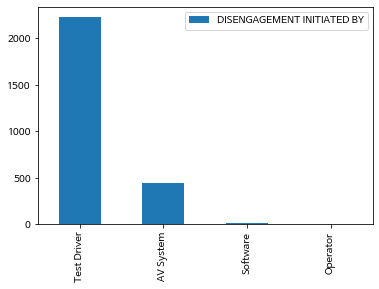

In [28]:
stop.plot.bar();

In [31]:
kind = pd.DataFrame(df_c['DISENGAGEMENT LOCATION'].value_counts()\
                    .sort_values(ascending=False))

kind

,DISENGAGEMENT LOCATION
Street,1462
street,672
STREET,187
Highway,178
Freeway,139
freeway,19
HIGHWAY,18
Parking Facility,1


#🪄 컬럼'DISENGAGEMENT LOCATION' 

표현만 다른 고윳값 하나로 만들기

In [34]:

def change(x):
  if str(x) == 'street':
    return str(x).replace('street','Street')

  elif str(x) == 'STREET':
    return str(x).replace('STREET','Street')
  
  elif str(x) == 'HIGHWAY':
    return str(x).replace('HIGHWAY','Highway')
  
  elif str(x) == 'freeway':
    return str(x).replace('freeway','Freeway')
  
  else:
    return str(x)


df_c['DISENGAGEMENT LOCATION'] =\
df_c['DISENGAGEMENT LOCATION'].apply(change)

#제대로 바뀌었는지 확인
kind = pd.DataFrame(df_c['DISENGAGEMENT LOCATION'].value_counts())

kind

,DISENGAGEMENT LOCATION
Street,2321
Highway,196
Freeway,158
Parking Facility,1


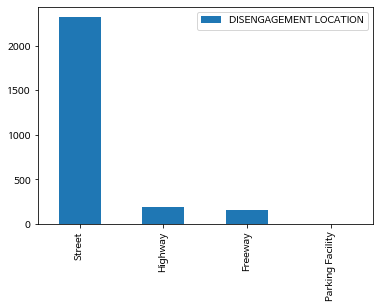

In [35]:
kind.plot.bar();